In [2]:
import numpy as np
from mjx_planner import cem_planner
import mujoco.mjx as mjx 
import mujoco
import time
import jax.numpy as jnp
import jax
import os
import matplotlib.pyplot as plt
import mediapy as media

In [3]:
start_time = time.time()
cem =  cem_planner(
    num_dof=6, 
    num_batch=100, 
    num_steps=50, 
    maxiter_cem=2,
    w_pos=5,
    w_rot=1.5,
    w_col=15,
    num_elite=0.05,
    timestep=0.05
    )
print(f"Initialized CEM Planner: {round(time.time()-start_time, 2)}s")


 Default backend: gpu
 Model path: /home/hurova/thesis_2025/sampling_based_planner/ur5e_hande_mjx/scene.xml 
 Timestep: 0.05 
 CEM Iter: 2 
 Number of batches: 100 
 Number of steps per trajectory: 50 
 Time per trajectory: 2.5
Initialized CEM Planner: 8.52s


In [4]:
xi_mean = jnp.zeros(cem.nvar)
xi_cov = 10*jnp.identity(cem.nvar)
key, subkey = jax.random.split(cem.key)

theta_init = jnp.zeros((cem.num_batch, cem.num_dof))
thetadot_init = jnp.zeros((cem.num_batch, cem.num_dof))
thetaddot_init = jnp.zeros((cem.num_batch, cem.num_dof))
thetadot_fin = jnp.zeros((cem.num_batch, cem.num_dof))
thetaddot_fin = jnp.zeros((cem.num_batch, cem.num_dof))

state_term = jnp.hstack((theta_init, thetadot_init, thetaddot_init, thetadot_fin, thetaddot_fin))
state_term = jnp.asarray(state_term)

In [9]:



xi_samples, key = cem.compute_xi_samples(key, xi_mean, xi_cov)
xi_filtered = cem.compute_projection_filter(xi_samples, state_term)

thetadot = jnp.dot(cem.A_thetadot, xi_filtered.T).T.reshape(cem.num_batch, cem.num_dof, cem.num)

In [ ]:
print(thetadot.reshape(cem.num_batch, cem.num_dof, cem.num).shape)

(100, 6, 50)


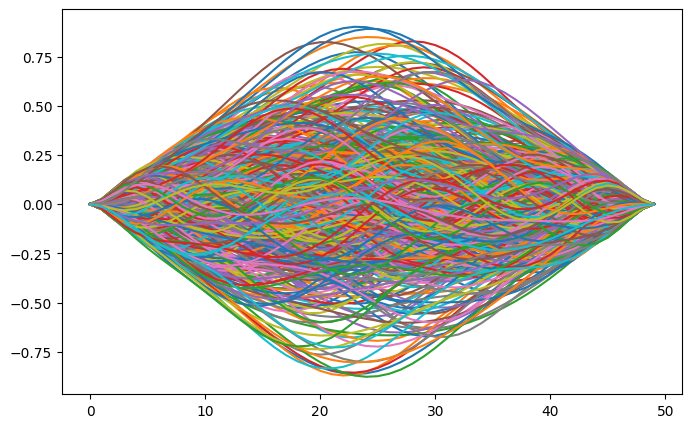

In [23]:
plt.figure(0, figsize=(8, 5))
for batch in range(cem.num_batch):
    plt.plot(thetadot[batch].T)
# plt.title("Velocities")
# plt.xlabel("Step")
# plt.ylabel("Velocity")
# plt.legend(['joint 1', 'joint 2', 'joint 3', 'joint 4', 'joint 5', 'joint 6'], loc='upper left')
plt.savefig('thetadot_thesis.png')
plt.show()